# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [56]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)


Number of cities in the list: 265
['adamstown', 'bilibino', 'oranjemund', 'grytviken', 'iqaluit', 'awjilah', 'edinburgh of the seven seas', 'yellowknife', 'orel', 'sao vicente', 'vorkuta', 'tiksi', 'tinogasta', 'la passe', 'doka', 'blackmans bay', 'stanley', 'bikenibeu village', 'east london', 'papatowai', 'toga village', 'ushuaia', 'san patricio', 'waitangi', 'lebu', 'nanao', 'yigo village', 'noosa heads', 'puerto san carlos', 'olonkinbyen', 'male', 'clinton', 'kodiak', 'bredasdorp', 'port-aux-francais', 'holualoa', 'north tamworth', 'constantia', 'carnarvon', 'puerto ayora', 'shalkar', 'hawaiian paradise park', 'justo daract', 'tateyama', 'tortoli', 'tutoia', 'west island', 'fale old settlement', 'preobrazheniye', 'sitka', 'micoud', 'neelankarai', 'ilulissat', 'nuuk', 'remire-montjoly', 'ribeira grande', 'pisco', 'utrik', 'puerto armuelles', 'tabou', 'codrington', 'ystad', 'hammerfest', 'port elizabeth', 'college', 'taiohae', 'lazaro cardenas', 'taulaga', 'vinton', 'albany', 'puerto 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [57]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

    try:
        # Parse the JSON and retrieve data
        city_details = requests.get(city_url).json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_details["coord"]["lat"]
        city_lng = city_details["coord"]["lon"]
        city_max_temp = city_details["main"]["temp_max"]
        city_humidity = city_details["main"]["humidity"]
        city_clouds = city_details["clouds"]["all"]
        city_wind = city_details["wind"]["speed"]
        city_country = city_details["sys"]["country"]
        city_date = city_details["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print(city_max_temp)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
71.8
Processing Record 2 of Set 1 | bilibino
72.07
Processing Record 3 of Set 1 | oranjemund
57.99
Processing Record 4 of Set 1 | grytviken
23.47
Processing Record 5 of Set 1 | iqaluit
47.93
Processing Record 6 of Set 1 | awjilah
92.8
Processing Record 7 of Set 1 | edinburgh of the seven seas
58.41
Processing Record 8 of Set 1 | yellowknife
68.52
Processing Record 9 of Set 1 | orel
58.32
Processing Record 10 of Set 1 | sao vicente
78.98
Processing Record 11 of Set 1 | vorkuta
51.49
Processing Record 12 of Set 1 | tiksi
35.55
Processing Record 13 of Set 1 | tinogasta
68.54
Processing Record 14 of Set 1 | la passe
69.03
Processing Record 15 of Set 1 | doka
79.3
Processing Record 16 of Set 1 | blackmans bay
52.74
Processing Record 17 of Set 1 | stanley
59.72
Processing Record 18 of Set 1 | bikenibeu village
80.56
Processing Record 19 of Set 1 | east london
65.79
Processing Record 20 of Set

In [58]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        254 non-null    object 
 1   Lat         254 non-null    float64
 2   Lng         254 non-null    float64
 3   Max Temp    254 non-null    float64
 4   Humidity    254 non-null    int64  
 5   Cloudiness  254 non-null    int64  
 6   Wind Speed  254 non-null    float64
 7   Country     254 non-null    object 
 8   Date        254 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 18.0+ KB


In [59]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,71.80,79,100,20.31,PN,1689448088
1,bilibino,68.0546,166.4372,72.07,51,10,2.19,RU,1689448088
2,oranjemund,-28.5500,16.4333,57.99,70,0,5.48,NA,1689448089
3,grytviken,-54.2811,-36.5092,23.47,76,4,6.06,GS,1689448089
4,iqaluit,63.7506,-68.5145,47.93,79,79,5.99,CA,1689448090


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("Starter_code/output_data/cities.csv", index_label="City_ID")


In [61]:
# Read saved data
city_data_df = pd.read_csv("Starter_code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,71.80,79,100,20.31,PN,1689448088
1,bilibino,68.0546,166.4372,72.07,51,10,2.19,RU,1689448088
2,oranjemund,-28.5500,16.4333,57.99,70,0,5.48,NaN,1689448089
3,grytviken,-54.2811,-36.5092,23.47,76,4,6.06,GS,1689448089
4,iqaluit,63.7506,-68.5145,47.93,79,79,5.99,CA,1689448090


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

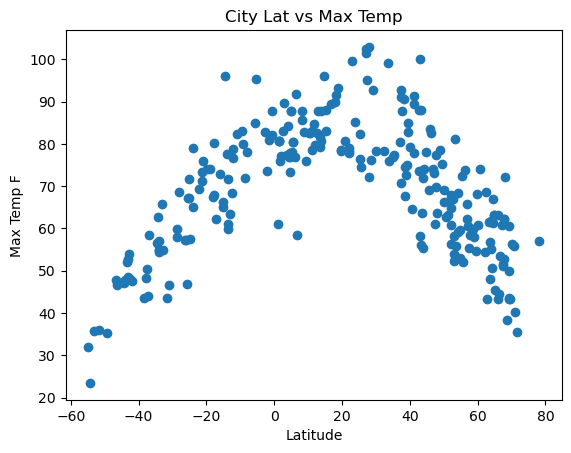

In [62]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"]
)

# graph properties
plt.title("City Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp F")

# Save the figure
plt.savefig("Starter_code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

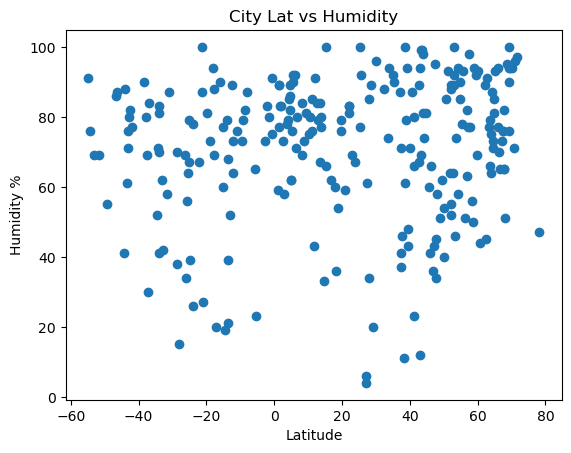

In [63]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"]
)

# graph properties
plt.title("City Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("Starter_code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

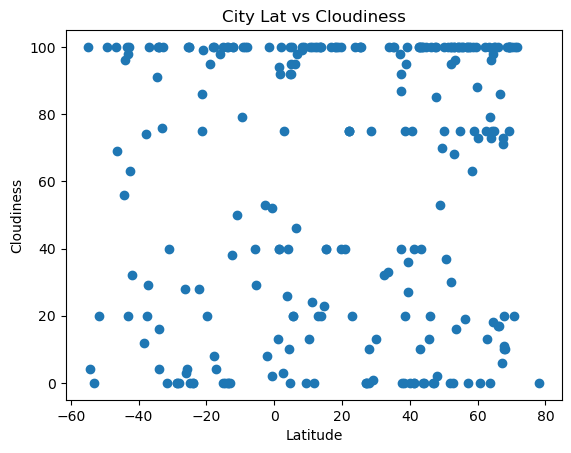

In [64]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"]
)

# graph properties
plt.title("City Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("Starter_code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

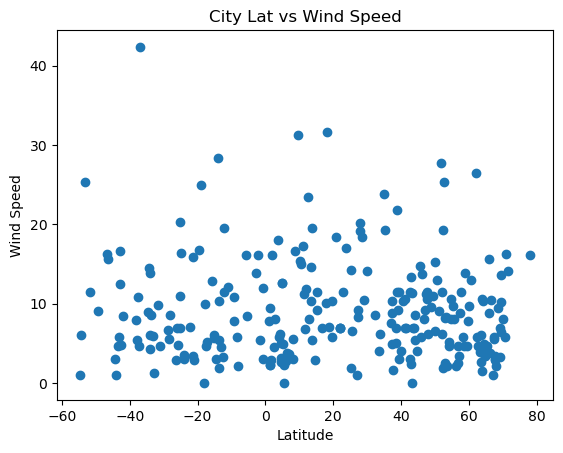

In [65]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"]
)

# graph properties
plt.title("City Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("Starter_code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
import scipy.stats
def linear_regression(x,y,title,coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coord,fontsize=15,color="red")
    print(f"The r-value is: {round(scipy.stats.pearsonr(x, y)[0],2)}")
    plt.ylabel(title)
    
    return line_eq

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,72.07,51,10,2.19,RU,1689448088
4,iqaluit,63.7506,-68.5145,47.93,79,79,5.99,CA,1689448090
5,awjilah,29.1081,21.2869,92.80,20,1,10.47,LY,1689448090
7,yellowknife,62.4560,-114.3525,68.52,45,75,5.75,CA,1689447793
8,orel,52.9658,36.0803,58.32,89,68,8.23,RU,1689448092


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,71.80,79,100,20.31,PN,1689448088
2,oranjemund,-28.5500,16.4333,57.99,70,0,5.48,NaN,1689448089
3,grytviken,-54.2811,-36.5092,23.47,76,4,6.06,GS,1689448089
6,edinburgh of the seven seas,-37.0676,-12.3116,58.41,84,100,42.37,SH,1689448091
9,sao vicente,-23.9631,-46.3919,78.98,26,0,3.00,BR,1689448093


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.71


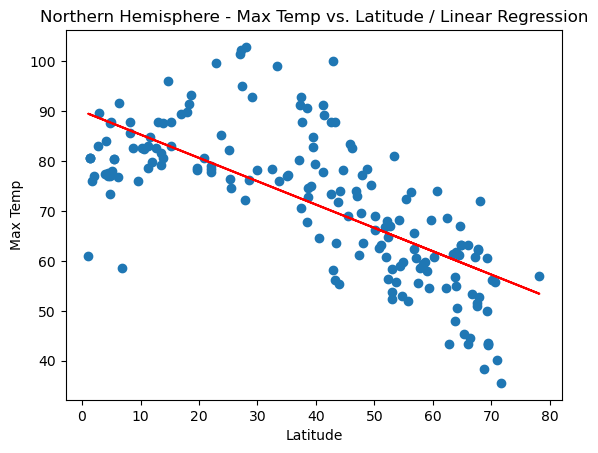

In [69]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (10,20))

plt.title("Northern Hemisphere - Max Temp vs. Latitude / Linear Regression")
plt.xlabel("Latitude")
plt.savefig("Starter_Code/output_data/Fig5.png")

The r-value is: 0.88


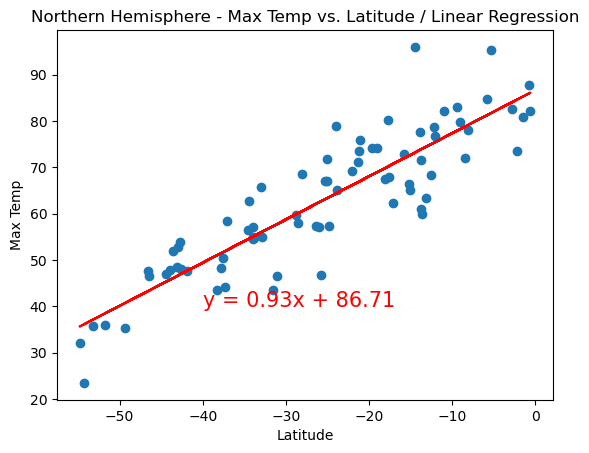

In [70]:
# Linear regression on Northern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-40,40))

plt.title("Northern Hemisphere - Max Temp vs. Latitude / Linear Regression")
plt.xlabel("Latitude")
plt.savefig("Starter_Code/output_data/Fig6.png")

**Discussion about the linear relationship:** There is a strong correlation between the Max Temp and the latitude. The correlation is stronger in the Northern hemisphere vs the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03


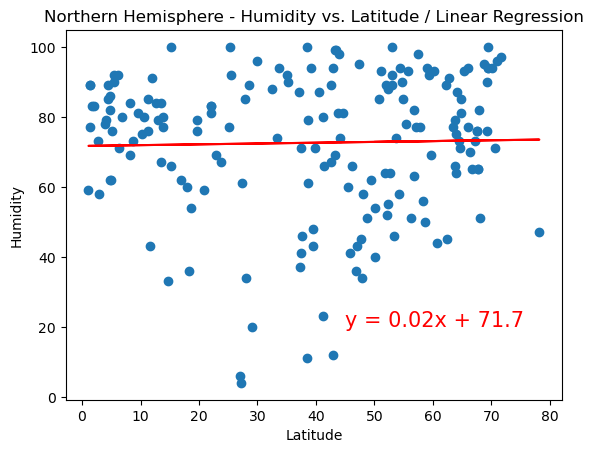

In [71]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (45,20))

plt.title("Northern Hemisphere - Humidity vs. Latitude / Linear Regression")
plt.xlabel("Latitude")
plt.savefig("Starter_Code/output_data/Fig7.png")

The r-value is: -0.05


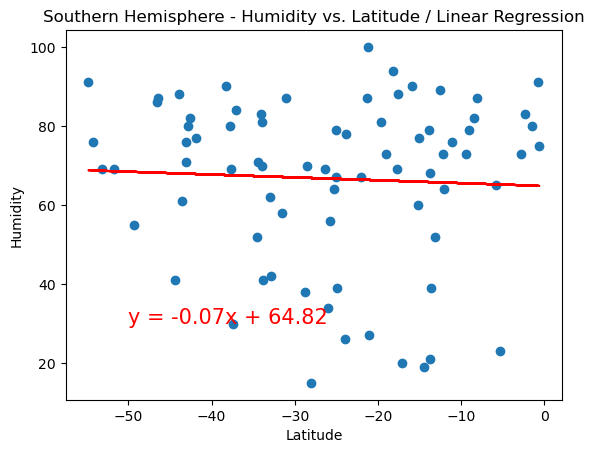

In [72]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-50,30))

plt.title("Southern Hemisphere - Humidity vs. Latitude / Linear Regression")
plt.xlabel("Latitude")
plt.savefig("Starter_Code/output_data/Fig8.png")

**Discussion about the linear relationship:** There is a weak correlation between latitude and humidity in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06


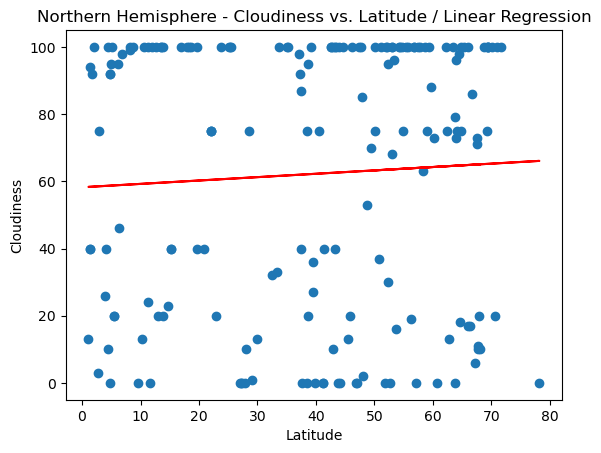

In [73]:

# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (-50,20))

plt.title("Northern Hemisphere - Cloudiness vs. Latitude / Linear Regression")
plt.xlabel("Latitude")
plt.savefig("Starter_Code/output_data/Fig9.png")

The r-value is: -0.03


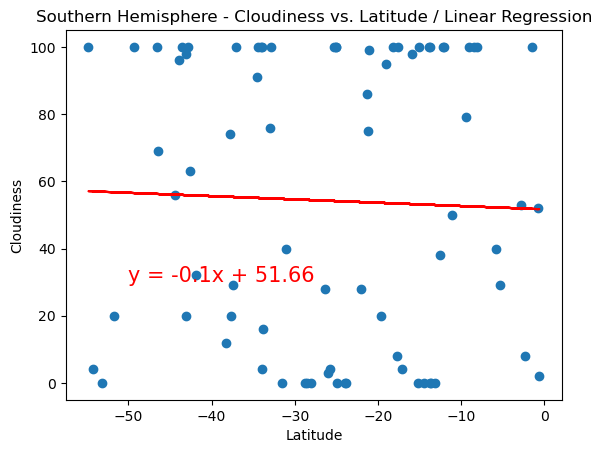

In [74]:
# Southern Hemisphere

linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-50,30))

plt.title("Southern Hemisphere - Cloudiness vs. Latitude / Linear Regression")
plt.xlabel("Latitude")
plt.savefig("Starter_Code/output_data/Fig10.png")

**Discussion about the linear relationship:** For latitude vs cloudiness, here is a weak negative correlation in the northern hemisphere and a weak positive correlation in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1


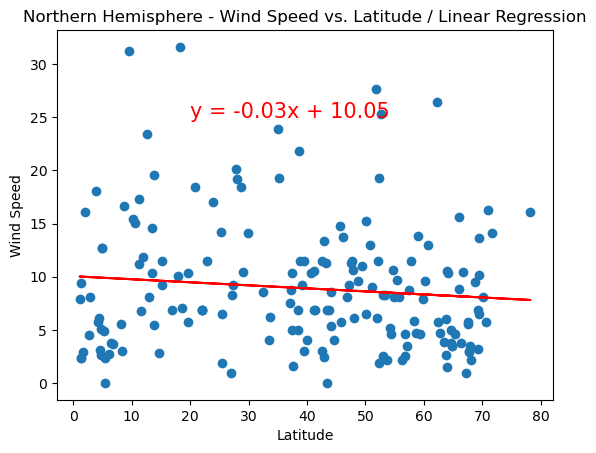

In [75]:
# Northern Hemisphere

linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (20,25))

plt.title("Northern Hemisphere - Wind Speed vs. Latitude / Linear Regression")
plt.xlabel("Latitude")
plt.savefig("Starter_Code/output_data/Fig11.png")

The r-value is: -0.03


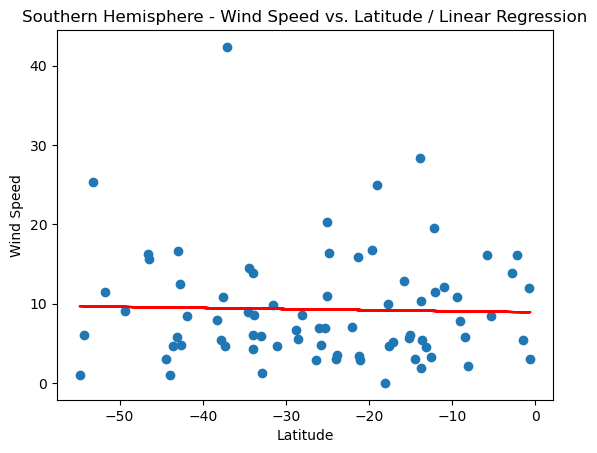

In [76]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (20,25))

plt.title("Southern Hemisphere - Wind Speed vs. Latitude / Linear Regression")
plt.xlabel("Latitude")
plt.savefig("Starter_Code/output_data/Fig12.png")

**Discussion about the linear relationship:** There correlation between wind speed and latitude is weak but negative in the southern hemisphere and weak but positive in the northern hemisphere.